<a href="https://colab.research.google.com/github/CrishmiCosta/FloodForecasting/blob/main/FloodForecastingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Flood Prediction**

In [422]:
import numpy as np
import pandas as pd

##**Preparing the DataSet**

In [423]:
file_name = 'https://raw.githubusercontent.com/CrishmiCosta/FloodForecasting/main/DataSets/kerala.csv'

# Load CSV File
data = pd.read_csv(file_name)
data.sample(20)


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
67,KERALA,1968,7.3,30.5,89.2,133.3,90.0,696.4,1308.9,380.7,325.4,178.9,119.4,32.7,3392.7,YES
109,KERALA,2010,18.6,1.0,31.4,138.9,190.6,667.5,629.0,356.0,275.6,441.4,335.1,46.8,3131.8,YES
16,KERALA,1917,2.9,47.6,79.4,38.1,122.9,703.7,342.7,335.1,470.3,264.1,256.4,41.6,2704.8,NO
8,KERALA,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3,3050.2,YES
97,KERALA,1998,6.0,2.1,8.1,61.1,151.6,732.5,641.4,371.8,517.6,444.8,135.0,79.4,3151.5,YES
37,KERALA,1938,0.3,79.0,53.3,164.5,179.6,681.6,648.6,287.9,223.2,223.7,69.5,22.9,2634.1,NO
31,KERALA,1932,0.1,19.3,28.6,113.0,646.5,341.0,716.4,423.2,317.3,543.2,223.2,31.3,3403.0,YES
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
108,KERALA,2009,3.3,1.5,62.6,69.0,191.6,438.2,924.9,269.3,326.5,205.2,274.4,44.2,2810.6,NO
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES


In [424]:
data.shape

(118, 16)

In [425]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [426]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SUBDIVISION,118,2,KERALA,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR,118,NaN,NaN,NaN,1959.5,34.2077,1901,1930.25,1959.5,1988.75,2018
JAN,118,NaN,NaN,NaN,12.2186,15.4738,0,2.175,5.8,18.175,83.5
FEB,118,NaN,NaN,NaN,15.6339,16.4063,0,4.7,8.35,21.4,79
MAR,118,NaN,NaN,NaN,36.6703,30.0639,0.1,18.1,28.4,49.825,217.2
APR,118,NaN,NaN,NaN,110.331,44.6335,13.1,74.35,110.4,136.45,238
MAY,118,NaN,NaN,NaN,228.645,147.549,53.4,125.05,184.6,264.875,738.8
JUN,118,NaN,NaN,NaN,651.618,186.181,196.8,535.55,625.6,786.975,1098.2
JUL,118,NaN,NaN,NaN,698.22,228.989,167.5,533.2,691.65,832.425,1526.5
AUG,118,NaN,NaN,NaN,430.369,181.98,178.6,316.725,386.25,500.1,1398.9


In [427]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,118.0,1959.500000,34.207699,1901.0,1930.250,1959.50,1988.750,2018.0
JAN,118.0,12.218644,15.473766,0.0,2.175,5.80,18.175,83.5
FEB,118.0,15.633898,16.406290,0.0,4.700,8.35,21.400,79.0
MAR,118.0,36.670339,30.063862,0.1,18.100,28.40,49.825,217.2
APR,118.0,110.330508,44.633452,13.1,74.350,110.40,136.450,238.0
MAY,118.0,228.644915,147.548778,53.4,125.050,184.60,264.875,738.8
JUN,118.0,651.617797,186.181363,196.8,535.550,625.60,786.975,1098.2
JUL,118.0,698.220339,228.988966,167.5,533.200,691.65,832.425,1526.5
AUG,118.0,430.369492,181.980463,178.6,316.725,386.25,500.100,1398.9
SEP,118.0,246.207627,121.901131,41.3,155.425,223.55,334.500,526.7


In [428]:
data.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [429]:
data.dtypes

SUBDIVISION          object
YEAR                  int64
JAN                 float64
FEB                 float64
MAR                 float64
APR                 float64
MAY                 float64
JUN                 float64
JUL                 float64
AUG                 float64
SEP                 float64
OCT                 float64
NOV                 float64
DEC                 float64
 ANNUAL RAINFALL    float64
FLOODS               object
dtype: object

In [430]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


##**Drop Unnecessary Columns**




In [431]:
data.drop(labels='SUBDIVISION', axis=1, inplace=True)

In [432]:
data.drop(labels=1, axis=0)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
5,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0,2708.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


##**Drop Rows with Missing Values**

In [433]:
data.isna()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
115,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
116,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [434]:
data['FLOODS'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
113    False
114    False
115    False
116    False
117    False
Name: FLOODS, Length: 118, dtype: bool

In [435]:
data.loc[data['FLOODS'].isna()]

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS


In [436]:
data.shape

(118, 15)

##**Create Unique ID**

In [437]:
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [438]:
data.index

RangeIndex(start=0, stop=118, step=1)

In [439]:
data['ID'] = data.index+1
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS,ID
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES,2
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES,3
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES,4
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO,5


##**Rearranging Columns**

In [440]:
data.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS', 'ID'],
      dtype='object')

In [441]:
data = data[['ID', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS']]

data.head()

,ID,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,2,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,3,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,4,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,5,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


##**Creating New Binary Column**

In [442]:
data.head()

,ID,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,2,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,3,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,4,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,5,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [443]:
data['FLOODS']

0      YES
1      YES
2      YES
3      YES
4       NO
      ... 
113    YES
114     NO
115     NO
116     NO
117    YES
Name: FLOODS, Length: 118, dtype: object

In [444]:
data['FLOODBINARY'] = data['FLOODS']
data.head()

,ID,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS,FLOODBINARY
0,1,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES,YES
1,2,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES,YES
2,3,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES,YES
3,4,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES,YES
4,5,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO,NO


In [445]:
# Replacing YES/NO with 1/0

data['FLOODBINARY'].replace(['YES','NO'],[1,0],inplace=True)

In [446]:
data.head()

,ID,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS,FLOODBINARY
0,1,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES,1
1,2,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES,1
2,3,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES,1
3,4,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES,1
4,5,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO,0


In [447]:
data.sample(20)

,ID,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS,FLOODBINARY
110,111,2011,20.5,45.7,24.1,165.2,124.2,788.5,536.8,492.7,391.2,227.2,169.7,49.5,3035.1,YES,1
54,55,1955,4.2,6.3,28.2,125.9,544.2,782.4,392.8,236.0,438.5,378.2,178.1,19.8,3134.7,YES,1
28,29,1929,12.8,29.8,58.9,210.7,148.0,946.6,844.0,293.9,268.9,350.4,158.2,39.4,3361.6,YES,1
14,15,1915,16.9,23.5,42.7,106.0,154.5,696.1,775.6,298.8,396.6,196.6,302.5,14.9,3024.5,YES,1
64,65,1965,9.1,0.9,28.3,109.8,214.5,597.7,465.1,296.1,150.1,183.7,131.7,155.5,2342.4,NO,0
104,105,2005,19.8,7.0,25.3,205.9,134.8,619.2,832.7,291.0,414.7,240.1,184.3,56.4,3031.1,YES,1
33,34,1934,74.5,1.7,47.7,92.4,106.7,852.9,415.0,337.2,48.4,335.9,93.4,4.9,2410.7,NO,0
52,53,1953,13.1,22.6,18.5,132.4,55.4,340.5,1027.6,356.4,100.5,410.5,62.2,5.1,2544.9,NO,0
23,24,1924,19.3,2.9,66.6,111.0,185.4,1011.7,1526.5,624.0,289.1,176.5,162.9,50.4,4226.4,YES,1
63,64,1964,1.1,7.8,67.2,83.3,94.8,379.4,754.2,548.0,398.2,325.7,191.7,17.8,2869.1,NO,0


In [448]:
data.shape

(118, 17)

##**Defining x-variables**

In [449]:
x_variables = ['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
data[x_variables].head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [450]:
y_variable = 'FLOODBINARY'
data[y_variable].head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODBINARY, dtype: int64

In [451]:
x = data[x_variables].values
x

array([[1.901e+03, 2.870e+01, 4.470e+01, ..., 2.669e+02, 3.508e+02,
        4.840e+01],
       [1.902e+03, 6.700e+00, 2.600e+00, ..., 3.584e+02, 1.583e+02,
        1.215e+02],
       [1.903e+03, 3.200e+00, 1.860e+01, ..., 3.541e+02, 1.570e+02,
        5.900e+01],
       ...,
       [2.016e+03, 2.400e+00, 3.800e+00, ..., 2.259e+02, 1.254e+02,
        2.360e+01],
       [2.017e+03, 1.900e+00, 6.800e+00, ..., 1.924e+02, 9.250e+01,
        3.810e+01],
       [2.018e+03, 2.910e+01, 5.210e+01, ..., 3.561e+02, 1.254e+02,
        6.510e+01]])

In [452]:
y = data[y_variable].values
y

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1])

##**Graphical Analysis of Data**

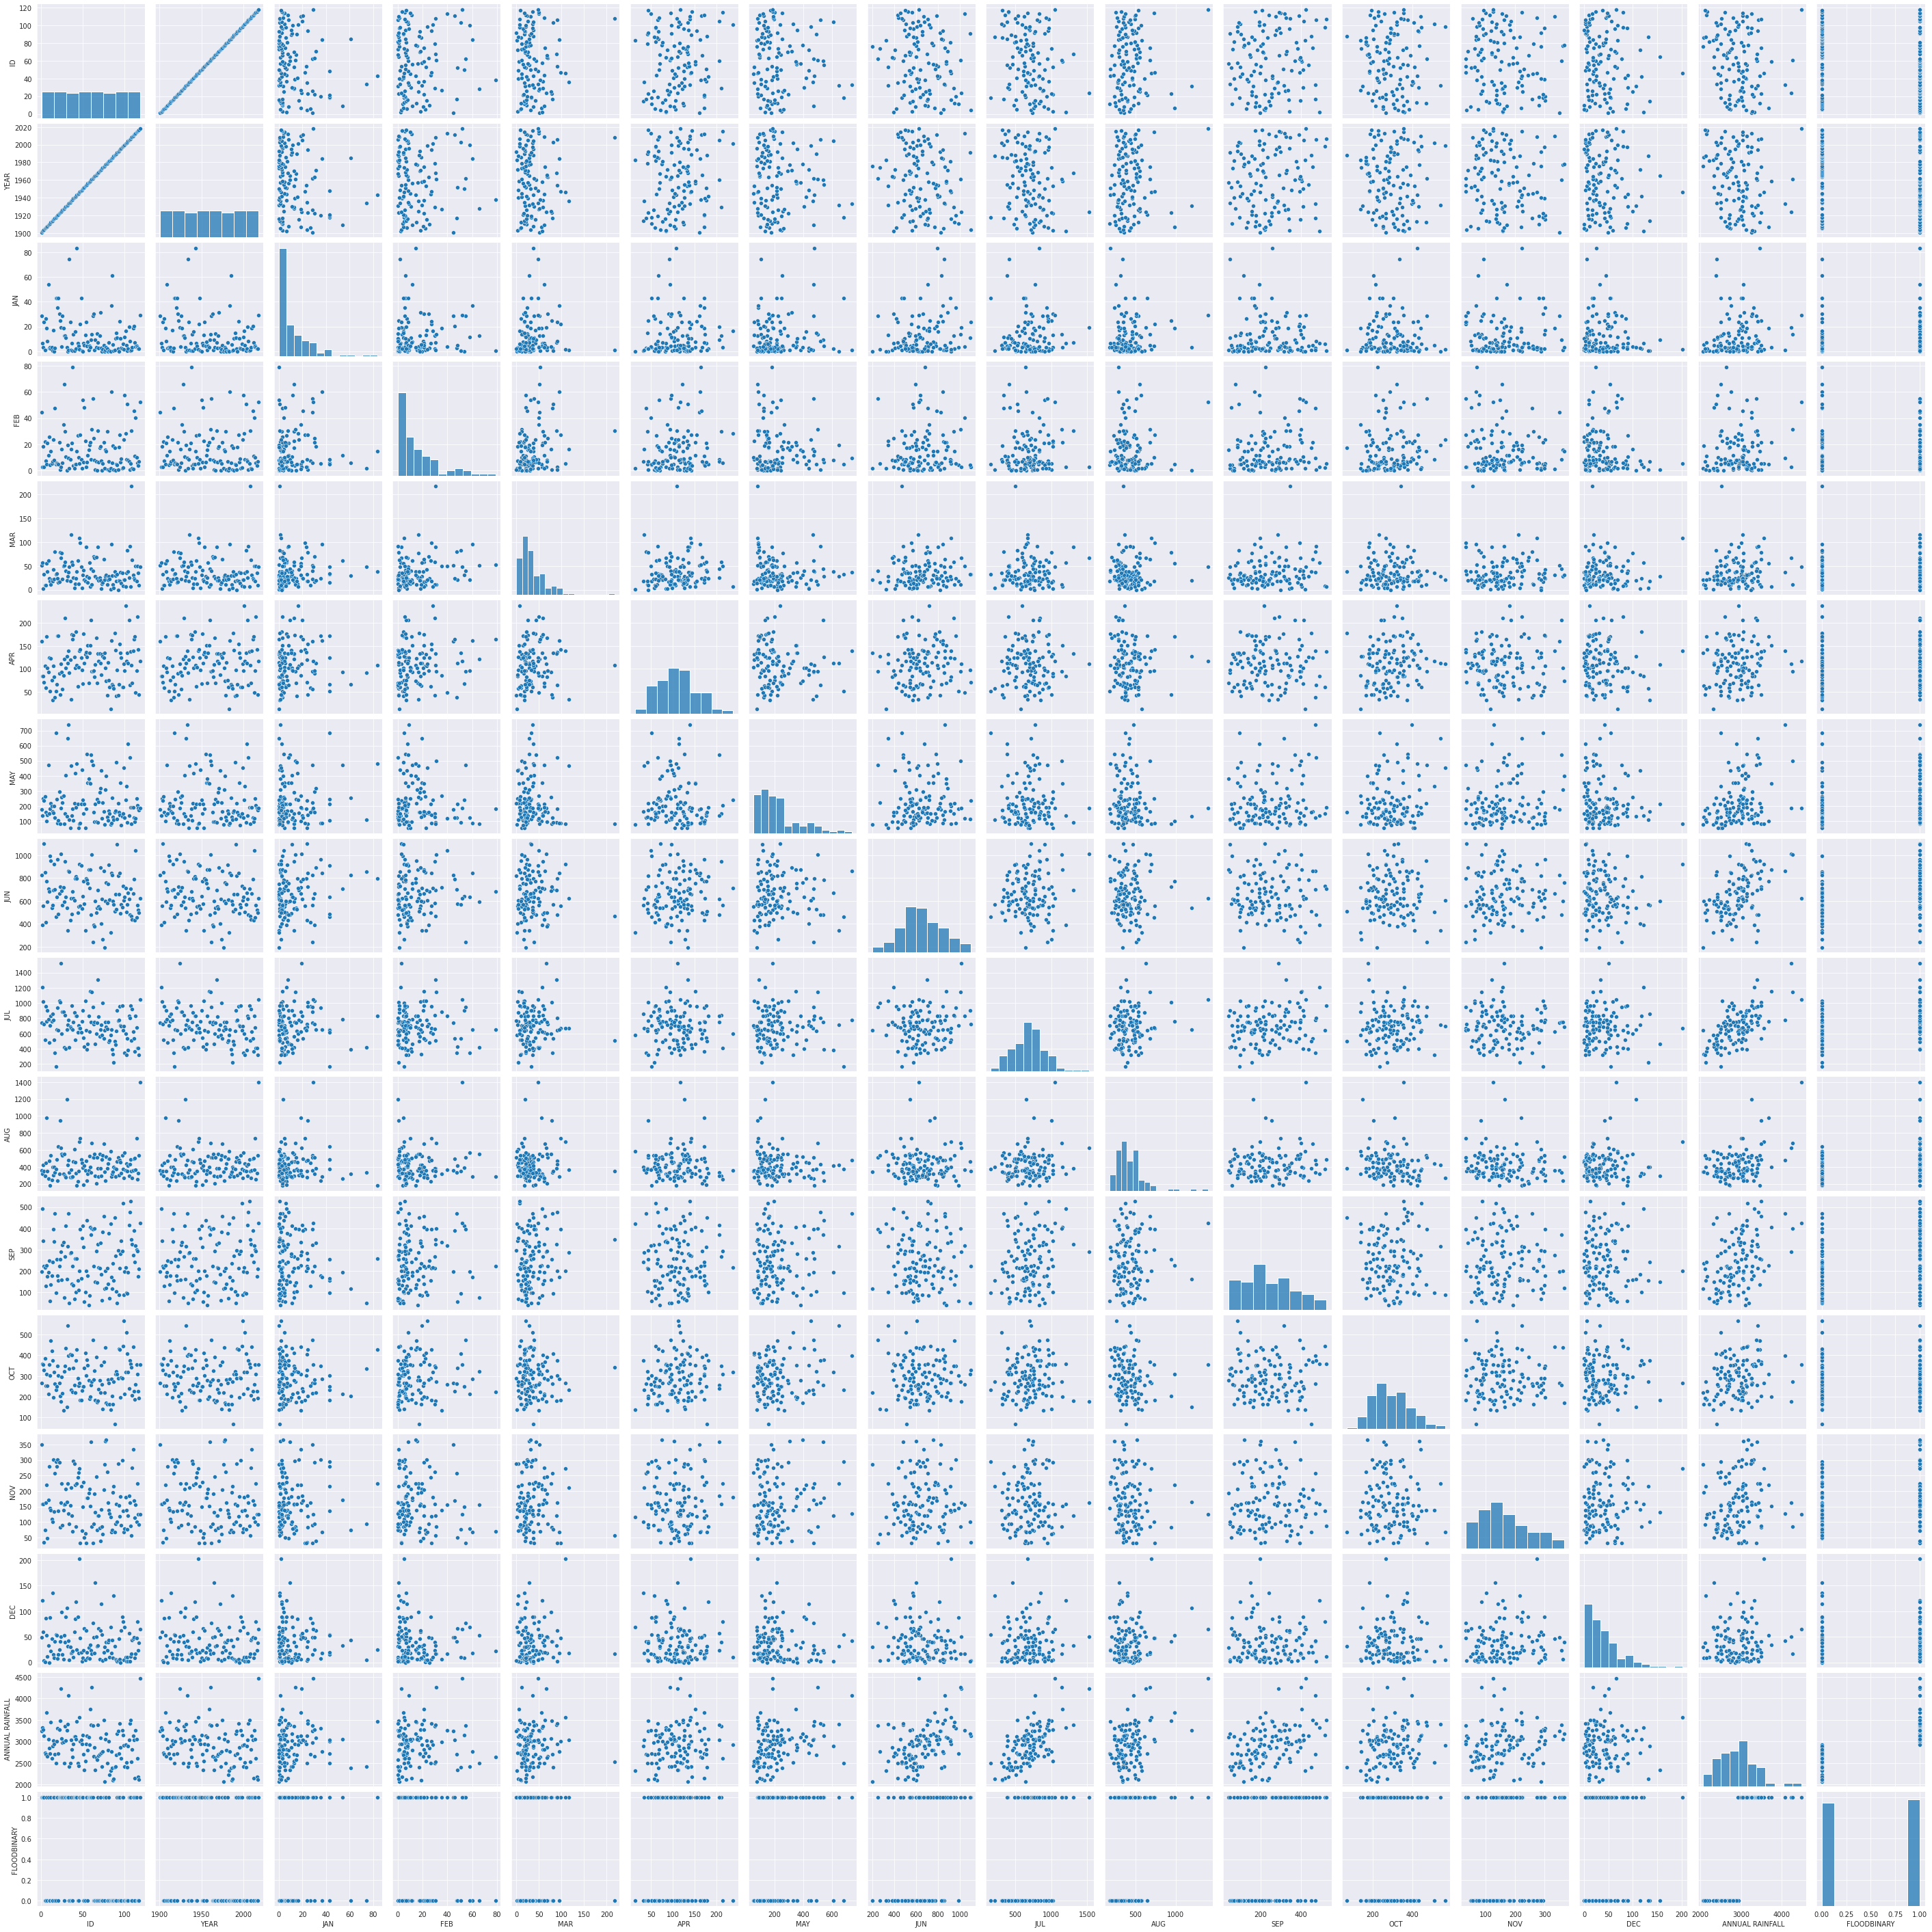

In [453]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.show()

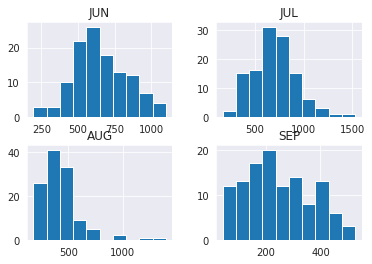

In [454]:
# Rainfall Variation during the rainy season
import matplotlib.pyplot as plt
%matplotlib inline

c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

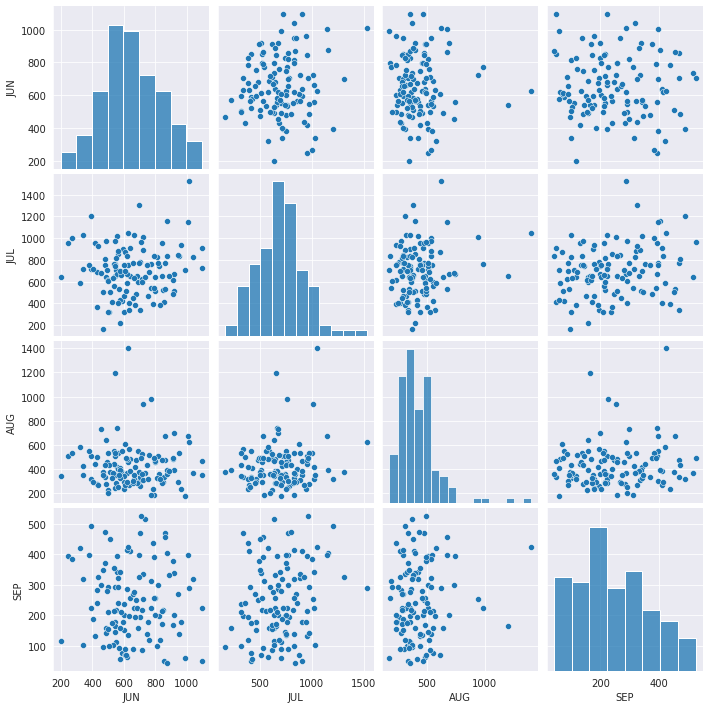

In [455]:
# Rainfall Variation during the rainy season

sns.pairplot(data[['JUN','JUL','AUG','SEP']])
plt.show()

##**Scaling Data between 1 to 0**

In [456]:
from sklearn import preprocessing

minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

##**Train & Test DataSets**

In [457]:
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(F"Train sample size = {len(x_train)}")
print(F"Test sample size  = {len(x_test)}")

Train sample size = 94
Test sample size  = 24


##**Prediction Algorithms**

In [458]:
# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn import metrics

###**01. Logisitic Regression Model**

In [459]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [460]:
# Create model object
model = LogisticRegression()

# Train Model
model.fit(x_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [461]:
# Predict Probability
model.predict_proba(x_test_std)[:24]

array([[0.41755698, 0.58244302],
       [0.43453032, 0.56546968],
       [0.40635216, 0.59364784],
       [0.36566986, 0.63433014],
       [0.46322004, 0.53677996],
       [0.31387779, 0.68612221],
       [0.65351158, 0.34648842],
       [0.47951327, 0.52048673],
       [0.5679722 , 0.4320278 ],
       [0.26397458, 0.73602542],
       [0.30787027, 0.69212973],
       [0.67308493, 0.32691507],
       [0.47168482, 0.52831518],
       [0.69654468, 0.30345532],
       [0.57653817, 0.42346183],
       [0.42266155, 0.57733845],
       [0.67211182, 0.32788818],
       [0.08561181, 0.91438819],
       [0.28717918, 0.71282082],
       [0.69528952, 0.30471048],
       [0.2804939 , 0.7195061 ],
       [0.77016315, 0.22983685],
       [0.3096534 , 0.6903466 ],
       [0.36132654, 0.63867346]])

In [462]:
# Predict Class
model.predict(x_test_std)[:24]

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1])

In [463]:
# Predict on Testing Data

# probabilities
y_pred_prob = model.predict_proba(x_test_std)[:, 1]

# Prediction
y_pred = model.predict(x_test_std)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(24)

,y_act,y_pred,y_pred_prob
3,1,1,0.634330
0,1,1,0.582443
8,0,0,0.432028
17,1,1,0.914388
1,1,1,0.565470
15,0,1,0.577338
16,0,0,0.327888
4,1,1,0.536780
5,1,1,0.686122
21,0,0,0.229837


In [464]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,All
y_act,,,
0,7,2,9
1,1,14,15
All,8,16,24


In [465]:
accuracy_lgr = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
accuracy_lgr

0.875

In [466]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
precision_lgr = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
precision_lgr

0.875

In [467]:
f1_score_lgr = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_lgr

0.8733396584440228

###**02. Random Forest Classification**

In [468]:
# Create model object
model = RandomForestClassifier(max_depth=3,random_state=0)

# Train Model
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [469]:
# Predict on Testing Data

# probabilities
y_pred_prob = model.predict_proba(x_test)[:, 1]

# Prediction
y_pred = model.predict(x_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(24)

,y_act,y_pred,y_pred_prob
13,0,0,0.341315
9,1,0,0.451081
17,1,1,0.785728
0,1,1,0.606042
15,0,1,0.628256
18,1,0,0.467393
23,1,0,0.447019
2,1,1,0.601705
14,1,1,0.563609
5,1,1,0.659717


In [470]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,All
y_act,,,
0,6,3,9
1,4,11,15
All,10,14,24


In [471]:
acuracy_rf = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_rf

0.7083333333333334

In [472]:
precision_rf = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
precision_rf

0.7857142857142857

In [473]:
f1_score_rf = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_rf

0.7109800362976406

###**03. Decision Tree Classifier**

In [474]:
# Create model object
model = DecisionTreeClassifier()

# Train Model
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [475]:
# Predict on Testing Data

# probabilities
y_pred_prob = model.predict_proba(x_test)[:, 1]

# Prediction
y_pred = model.predict(x_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(24)

,y_act,y_pred,y_pred_prob
8,0,0,0.0
22,1,1,1.0
3,1,1,1.0
5,1,1,1.0
10,1,1,1.0
23,1,0,0.0
13,0,0,0.0
0,1,1,1.0
20,1,1,1.0
21,0,1,1.0


In [476]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,All
y_act,,,
0,5,4,9
1,4,11,15
All,9,15,24


In [477]:
acuracy_tc = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_tc

0.6666666666666666

In [478]:
precision_tc = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
precision_tc

0.7333333333333333

In [479]:
f1_score_tc = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_tc

0.6666666666666666

##**Comparing Models**

In [480]:
metrics_comp = [['LGR', acuracy_lgr, precision_lgr, f1_score_lgr],
['TC', acuracy_tc, precision_tc, f1_score_tc],
['RF', acuracy_rf, precision_rf, f1_score_rf]]

pd.DataFrame(data=metrics_comp, columns=['Model', 'Accuracy', 'Precision', 'F1_score'])


,Model,Accuracy,Precision,F1_score
0,LGR,0.875000,0.875000,0.873340
1,TC,0.666667,0.733333,0.666667
2,RF,0.708333,0.785714,0.710980


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


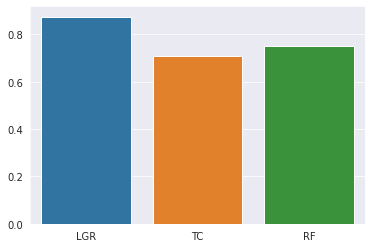

In [481]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

x = ['LGR', 'TC', 'RF']
y = [0.875000, 0.708333, 0.750000]

sns.barplot(x, y)
plt.show()

##**Constructing Calibration Table for Selected Model**

In [482]:
# Selected Logistic Regression

# Create model object
model = LogisticRegression()

# Train Model
model.fit(x_train_std, y_train)

# Predict on Testing Data

# probabilities
y_pred_prob = model.predict_proba(x_test_std)[:, 1]

# Prediction
y_pred = model.predict(x_test_std)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(5)

,y_act,y_pred,y_pred_prob
1,1,1,0.565470
20,1,1,0.719506
15,0,1,0.577338
19,0,0,0.304710
11,0,0,0.326915


In [483]:
test_result['y_pred_prob'].value_counts(bins=10)

(0.572, 0.641]    5
(0.298, 0.367]    5
(0.504, 0.572]    4
(0.709, 0.777]    3
(0.641, 0.709]    3
(0.367, 0.435]    2
(0.846, 0.914]    1
(0.228, 0.298]    1
(0.777, 0.846]    0
(0.435, 0.504]    0
Name: y_pred_prob, dtype: int64

In [484]:
# Divide 10 buckets based on probability
test_result['prob_bucket'] = pd.cut(test_result['y_pred_prob'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
test_result['prob_bucket']

0     (0.5, 0.6]
1     (0.5, 0.6]
2     (0.5, 0.6]
3     (0.6, 0.7]
4     (0.5, 0.6]
5     (0.6, 0.7]
6     (0.3, 0.4]
7     (0.5, 0.6]
8     (0.4, 0.5]
9     (0.7, 0.8]
10    (0.6, 0.7]
11    (0.3, 0.4]
12    (0.5, 0.6]
13    (0.3, 0.4]
14    (0.4, 0.5]
15    (0.5, 0.6]
16    (0.3, 0.4]
17    (0.9, 1.0]
18    (0.7, 0.8]
19    (0.3, 0.4]
20    (0.7, 0.8]
21    (0.2, 0.3]
22    (0.6, 0.7]
23    (0.6, 0.7]
Name: prob_bucket, dtype: category
Categories (10, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] < ... <
                                     (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [485]:
calibration_table  = test_result.groupby(by='prob_bucket').agg(
    count=pd.NamedAgg(column="prob_bucket", aggfunc="count"),
    response_count=pd.NamedAgg(column="y_act", aggfunc="sum"),
    min_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="min"),
    mean_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="mean"),
    ).reset_index()

calibration_table

,prob_bucket,count,response_count,min_probability,mean_probability
0,"(0.0, 0.1]",0,0,NaN,NaN
1,"(0.1, 0.2]",0,0,NaN,NaN
2,"(0.2, 0.3]",1,0,0.229837,0.229837
3,"(0.3, 0.4]",5,0,0.303455,0.321891
4,"(0.4, 0.5]",2,1,0.423462,0.427745
5,"(0.5, 0.6]",7,5,0.520487,0.557783
6,"(0.6, 0.7]",5,5,0.634330,0.668320
7,"(0.7, 0.8]",3,3,0.712821,0.722784
8,"(0.8, 0.9]",0,0,NaN,NaN
9,"(0.9, 1.0]",1,1,0.914388,0.914388


In [486]:
# Divide 10 buckets with even samples sorted by probability
test_result['q_bucket'] = pd.qcut(test_result['y_pred_prob'], q=10, duplicates='drop')
test_result['q_bucket']

0     (0.571, 0.591]
1      (0.53, 0.571]
2     (0.591, 0.643]
3     (0.591, 0.643]
4      (0.53, 0.571]
5     (0.643, 0.691]
6     (0.339, 0.431]
7      (0.431, 0.53]
8      (0.431, 0.53]
9     (0.718, 0.914]
10    (0.691, 0.718]
11    (0.311, 0.339]
12     (0.431, 0.53]
13    (0.229, 0.311]
14    (0.339, 0.431]
15    (0.571, 0.591]
16    (0.311, 0.339]
17    (0.718, 0.914]
18    (0.691, 0.718]
19    (0.229, 0.311]
20    (0.718, 0.914]
21    (0.229, 0.311]
22    (0.643, 0.691]
23    (0.591, 0.643]
Name: q_bucket, dtype: category
Categories (10, interval[float64]): [(0.229, 0.311] < (0.311, 0.339] < (0.339, 0.431] < (0.431, 0.53] <
                                     ... < (0.591, 0.643] < (0.643, 0.691] <
                                     (0.691, 0.718] < (0.718, 0.914]]

In [487]:
calib_table  = test_result.groupby(by='q_bucket').agg(
    count=pd.NamedAgg(column="q_bucket", aggfunc="count"),
    response_count=pd.NamedAgg(column="y_act", aggfunc="sum"),
    min_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="min"),
    mean_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="mean"),
    ).reset_index()

calib_table

,q_bucket,count,response_count,min_probability,mean_probability
0,"(0.229, 0.311]",3,0,0.229837,0.279334
1,"(0.311, 0.339]",2,0,0.326915,0.327402
2,"(0.339, 0.431]",2,1,0.346488,0.384975
3,"(0.431, 0.53]",3,1,0.432028,0.493610
4,"(0.53, 0.571]",2,2,0.536780,0.551125
5,"(0.571, 0.591]",2,1,0.577338,0.579891
6,"(0.591, 0.643]",3,3,0.593648,0.622217
7,"(0.643, 0.691]",2,2,0.686122,0.688234
8,"(0.691, 0.718]",2,2,0.692130,0.702475
9,"(0.718, 0.914]",3,3,0.719506,0.789973


In [488]:
calib_table['precision'] = calib_table['response_count'] / calib_table['count'] 
calib_table['response_fraction'] = calib_table['response_count'] / calib_table['response_count'].sum()
calib_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction
0,"(0.229, 0.311]",3,0,0.229837,0.279334,0.000000,0.000000
1,"(0.311, 0.339]",2,0,0.326915,0.327402,0.000000,0.000000
2,"(0.339, 0.431]",2,1,0.346488,0.384975,0.500000,0.066667
3,"(0.431, 0.53]",3,1,0.432028,0.493610,0.333333,0.066667
4,"(0.53, 0.571]",2,2,0.536780,0.551125,1.000000,0.133333
5,"(0.571, 0.591]",2,1,0.577338,0.579891,0.500000,0.066667
6,"(0.591, 0.643]",3,3,0.593648,0.622217,1.000000,0.200000
7,"(0.643, 0.691]",2,2,0.686122,0.688234,1.000000,0.133333
8,"(0.691, 0.718]",2,2,0.692130,0.702475,1.000000,0.133333
9,"(0.718, 0.914]",3,3,0.719506,0.789973,1.000000,0.200000


In [489]:
# Get cumulative sum in reverse order
calib_table = calib_table.sort_index(ascending=False)
calib_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction
9,"(0.718, 0.914]",3,3,0.719506,0.789973,1.000000,0.200000
8,"(0.691, 0.718]",2,2,0.692130,0.702475,1.000000,0.133333
7,"(0.643, 0.691]",2,2,0.686122,0.688234,1.000000,0.133333
6,"(0.591, 0.643]",3,3,0.593648,0.622217,1.000000,0.200000
5,"(0.571, 0.591]",2,1,0.577338,0.579891,0.500000,0.066667
4,"(0.53, 0.571]",2,2,0.536780,0.551125,1.000000,0.133333
3,"(0.431, 0.53]",3,1,0.432028,0.493610,0.333333,0.066667
2,"(0.339, 0.431]",2,1,0.346488,0.384975,0.500000,0.066667
1,"(0.311, 0.339]",2,0,0.326915,0.327402,0.000000,0.000000
0,"(0.229, 0.311]",3,0,0.229837,0.279334,0.000000,0.000000


In [490]:
calib_table['cumulative_response_count'] = calib_table['response_count'].cumsum()
calib_table['cumulative_count'] = calib_table['count'].cumsum()
calib_table = calib_table.sort_index(ascending=True)
calib_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction,cumulative_response_count,cumulative_count
0,"(0.229, 0.311]",3,0,0.229837,0.279334,0.000000,0.000000,15,24
1,"(0.311, 0.339]",2,0,0.326915,0.327402,0.000000,0.000000,15,21
2,"(0.339, 0.431]",2,1,0.346488,0.384975,0.500000,0.066667,15,19
3,"(0.431, 0.53]",3,1,0.432028,0.493610,0.333333,0.066667,14,17
4,"(0.53, 0.571]",2,2,0.536780,0.551125,1.000000,0.133333,13,14
5,"(0.571, 0.591]",2,1,0.577338,0.579891,0.500000,0.066667,11,12
6,"(0.591, 0.643]",3,3,0.593648,0.622217,1.000000,0.200000,10,10
7,"(0.643, 0.691]",2,2,0.686122,0.688234,1.000000,0.133333,7,7
8,"(0.691, 0.718]",2,2,0.692130,0.702475,1.000000,0.133333,5,5
9,"(0.718, 0.914]",3,3,0.719506,0.789973,1.000000,0.200000,3,3


In [491]:
calib_table['cumulative_precision'] = calib_table['cumulative_response_count']/calib_table['cumulative_count']
calib_table['cumulative_response_fraction'] = calib_table['cumulative_response_count'] / calib_table['response_count'].sum()
calib_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction,cumulative_response_count,cumulative_count,cumulative_precision,cumulative_response_fraction
0,"(0.229, 0.311]",3,0,0.229837,0.279334,0.000000,0.000000,15,24,0.625000,1.000000
1,"(0.311, 0.339]",2,0,0.326915,0.327402,0.000000,0.000000,15,21,0.714286,1.000000
2,"(0.339, 0.431]",2,1,0.346488,0.384975,0.500000,0.066667,15,19,0.789474,1.000000
3,"(0.431, 0.53]",3,1,0.432028,0.493610,0.333333,0.066667,14,17,0.823529,0.933333
4,"(0.53, 0.571]",2,2,0.536780,0.551125,1.000000,0.133333,13,14,0.928571,0.866667
5,"(0.571, 0.591]",2,1,0.577338,0.579891,0.500000,0.066667,11,12,0.916667,0.733333
6,"(0.591, 0.643]",3,3,0.593648,0.622217,1.000000,0.200000,10,10,1.000000,0.666667
7,"(0.643, 0.691]",2,2,0.686122,0.688234,1.000000,0.133333,7,7,1.000000,0.466667
8,"(0.691, 0.718]",2,2,0.692130,0.702475,1.000000,0.133333,5,5,1.000000,0.333333
9,"(0.718, 0.914]",3,3,0.719506,0.789973,1.000000,0.200000,3,3,1.000000,0.200000


##**Calibration Curve**

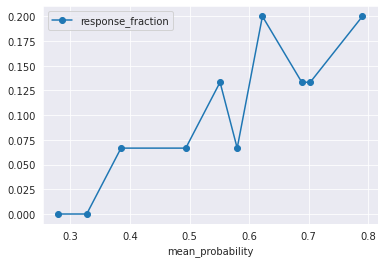

In [492]:
calib_table.plot(x='mean_probability', y='response_fraction', marker='o')

##**Receiver Operating Characteristic**

ROC AUC Score = 0.9555555555555556


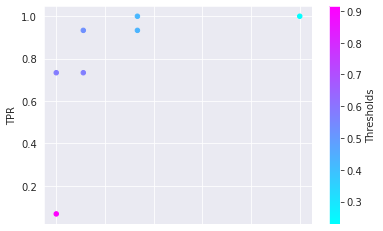

In [493]:
from matplotlib import cm # Colomaps

cmap = cm.get_cmap('cool') 

fpr, tpr, thresholds = metrics.roc_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)

roc = pd.DataFrame(data={'Thresholds':thresholds[1:], 'FPR':fpr[1:], 'TPR':tpr[1:]})
roc.plot(kind='scatter', x='FPR', y='TPR', c='Thresholds', cmap=cmap)

roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

print(F"ROC AUC Score = {roc_auc}")

In [494]:
roc.head()

,Thresholds,FPR,TPR
0,0.914388,0.000000,0.066667
1,0.582443,0.000000,0.733333
2,0.577338,0.111111,0.733333
3,0.528315,0.111111,0.933333
4,0.432028,0.333333,0.933333


##**Precision Recall Curve**

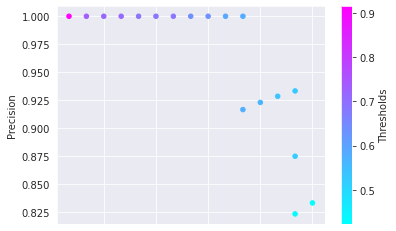

In [495]:
precision, recall, thresholds = metrics.precision_recall_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)

prc = pd.DataFrame(data={'Thresholds':thresholds, 'Precision':precision[:-1], 'Recall':recall[:-1]})
prc.plot(kind='scatter', x='Recall', y='Precision', c='Thresholds', cmap=cmap)